<a href="https://colab.research.google.com/github/dswh/lil_nlp_with_tensorflow/blob/main/02_04_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying News Headlines

This notebook explains the classification of news headlines as sarcastic and non-sarcastic. We are using the same headlines data as used before.


In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.5.0


## Downloading the News Headlines data

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/wdd-2-node.appspot.com/x1.json \
    -o /tmp/headlines.json

In [3]:
##read the the json file using pandas
import pandas as pd

data = pd.read_json("./x1.json")
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [5]:
##store headlines and labels in respective lists
headlines = list(data['headline'])
labels = list(data['is_sarcastic'])

## Set the parameters

In [6]:
##define tokenizing and padding parameters
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

## Splitting the training and testing set

In [7]:
##sentences
training_sentences = headlines[0:training_size]
testing_sentences = headlines[training_size:]

##labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Preprocess sentences


In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
# convert lists into numpy arrays to make it work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Define the neural network model with the following layers:
1. Embedding layer
2. Global Average pooling layer(1D)
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

##compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


## Train the model

Save it into history

In [16]:
num_epochs = 30
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

Epoch 1/30
625/625 - 7s - loss: 0.6665 - accuracy: 0.4769 - val_loss: 0.5578 - val_accuracy: 0.4751
Epoch 2/30
625/625 - 6s - loss: 0.4282 - accuracy: 0.4769 - val_loss: 0.3760 - val_accuracy: 0.4751
Epoch 3/30
625/625 - 8s - loss: 0.3187 - accuracy: 0.4769 - val_loss: 0.3550 - val_accuracy: 0.4751
Epoch 4/30
625/625 - 7s - loss: 0.2690 - accuracy: 0.4769 - val_loss: 0.3346 - val_accuracy: 0.4751
Epoch 5/30
625/625 - 6s - loss: 0.2319 - accuracy: 0.4769 - val_loss: 0.3311 - val_accuracy: 0.4751
Epoch 6/30
625/625 - 7s - loss: 0.2054 - accuracy: 0.4769 - val_loss: 0.3362 - val_accuracy: 0.4751
Epoch 7/30
625/625 - 8s - loss: 0.1828 - accuracy: 0.4769 - val_loss: 0.3464 - val_accuracy: 0.4751
Epoch 8/30
625/625 - 5s - loss: 0.1645 - accuracy: 0.4769 - val_loss: 0.3999 - val_accuracy: 0.4751
Epoch 9/30
625/625 - 6s - loss: 0.1506 - accuracy: 0.4769 - val_loss: 0.3760 - val_accuracy: 0.4751
Epoch 10/30
625/625 - 7s - loss: 0.1362 - accuracy: 0.4769 - val_loss: 0.3952 - val_accuracy: 0.4751

## Visualise the train & validation accuracy and loss

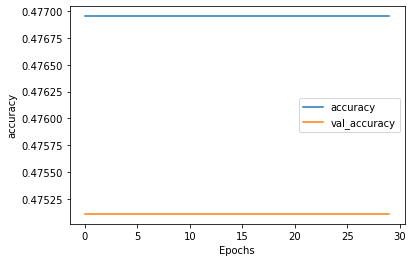

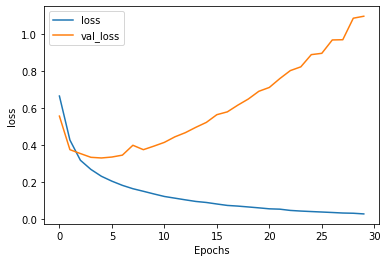

In [17]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.legend([string, 'val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Classifying a new sentence

In [18]:
sentence = ["the baby boy fears spiders in the garden might be real", "game of thrones season finale showing this sunday night"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqs))

[[1.]
 [1.]]
